# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
data_path = "../data/txt/"

## Choisir une décennie

In [4]:
DECADE = '1950'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [5]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [6]:
# Exemple de fichiers
files[:5]

['Bxl_1950_Tome_III_Part_1.txt',
 'Bxl_1950_Tome_III_Part_2.txt',
 'Bxl_1950_Tome_III_Part_3.txt',
 'Bxl_1950_Tome_III_Part_4.txt',
 'Bxl_1950_Tome_III_Part_5.txt']

In [7]:
texts = [open(data_path + f).read() for f in files]

In [8]:
# Exemple de textes
texts[0][:400]

'C O M P T E R E N D U D E L A SÉANCE D U 1 6 OCTOBRE 1 9 5 0 .\n\nVILLE\n\nDE BRUXELLES\n\nBULLETIN COMMUNAL\nAnnée 1950\nCONSEIL\nSéance\n\nCOMMUNAL\n\ndu 16 octobre\n\n1950.\n\nP r é s i d e n c e de M . J . V A N D E M E U L E B R O E C K ,\nBourgmestre.\n\nPAGES\n\nSOMMAIRE\n1.\n\nCommunications\n\n2.\n\nD é c è s de M . F r a n ç o i s\ncommunal\n\n3.\n4.\n\n,\nDe Ceuster, ancien\n\n904\n\nconseiller\n905\n\nR è g l e m e n t de polic'

## Vectoriser les documents à l'aide de TF-IDF

In [9]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [10]:
locavectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [11]:
%time tfidf_vectors = vectorizer.fit_transform(texts)

CPU times: user 4min 5s, sys: 291 ms, total: 4min 5s
Wall time: 4min 5s


In [12]:
# Détail de la matrice
tfidf_vectors

<312x6354 sparse matrix of type '<class 'numpy.float64'>'
	with 425512 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [13]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

colportage      0.288932
op              0.246078
frs             0.237571
of              0.222885
thonet          0.184822
                  ...   
dépassant       0.000000
départements    0.000000
département     0.000000
départ          0.000000
™               0.000000
Length: 6354, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [14]:
cosine([1, 2, 3], [1, 2, 3])

0

In [15]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [16]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [17]:
tfidf_array = tfidf_vectors.toarray()

In [18]:
# Vecteur du document 0
tfidf_array[0]

array([0.00739289, 0.03186491, 0.0047495 , ..., 0.        , 0.        ,
       0.        ])

In [19]:
# Vecteur du document 1
tfidf_array[1]

array([0.00676186, 0.03330861, 0.02172048, ..., 0.        , 0.        ,
       0.        ])

In [20]:
cosine(tfidf_array[0], tfidf_array[1])

0.7886070589754197

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [21]:
N_CLUSTERS = 3

### Instancier le modèle K-Means et ses arguments

In [22]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [23]:
clusters = km_model.fit_predict(tfidf_vectors)

In [24]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [25]:
pprint(dict(clustering))

{0: ['Bxl_1950_Tome_III_Part_6.txt',
     'Bxl_1950_Tome_III_Part_7.txt',
     'Bxl_1950_Tome_I_Part_7.txt',
     'Bxl_1950_Tome_I_Part_8.txt',
     'Bxl_1951_Tome_II_Part_17.txt',
     'Bxl_1951_Tome_II_Part_18.txt',
     'Bxl_1951_Tome_I_Part_6.txt',
     'Bxl_1951_Tome_I_Part_7.txt',
     'Bxl_1952_Tome_III_Part_5.txt',
     'Bxl_1952_Tome_III_Part_6.txt',
     'Bxl_1952_Tome_I_Part_8.txt',
     'Bxl_1953_Tome_III_Part_8.txt',
     'Bxl_1953_Tome_III_Part_9.txt',
     'Bxl_1953_Tome_I_Part_13.txt',
     'Bxl_1954_Tome_III_Part_8.txt',
     'Bxl_1954_Tome_III_Part_9.txt',
     'Bxl_1954_Tome_I_Part_10.txt',
     'Bxl_1955_Tome_II2_Part_8.txt',
     'Bxl_1955_Tome_II2_Part_9.txt',
     'Bxl_1955_Tome_I_Part_10.txt',
     'Bxl_1956_Tome_II2_Part_10.txt',
     'Bxl_1956_Tome_II2_Part_11.txt',
     'Bxl_1956_Tome_II2_Part_9.txt',
     'Bxl_1956_Tome_I_Part_12.txt',
     'Bxl_1956_Tome_I_Part_13.txt',
     'Bxl_1957_Tome_II2_Part_8.txt',
     'Bxl_1957_Tome_II2_Part_9.txt',
     'Bxl_1957

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [26]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [27]:
reduced_vectors[:10]

array([[-0.11313514,  0.12227814],
       [-0.04374365, -0.00716066],
       [-0.08038718,  0.13040176],
       [-0.10263283,  0.09309613],
       [-0.11320242,  0.09834708],
       [ 0.21724576,  0.39458456],
       [ 0.34982894,  0.46007835],
       [-0.12398966,  0.05457782],
       [ 0.21102976, -0.06010396],
       [-0.05970932,  0.05387659]])

### Générer le plot

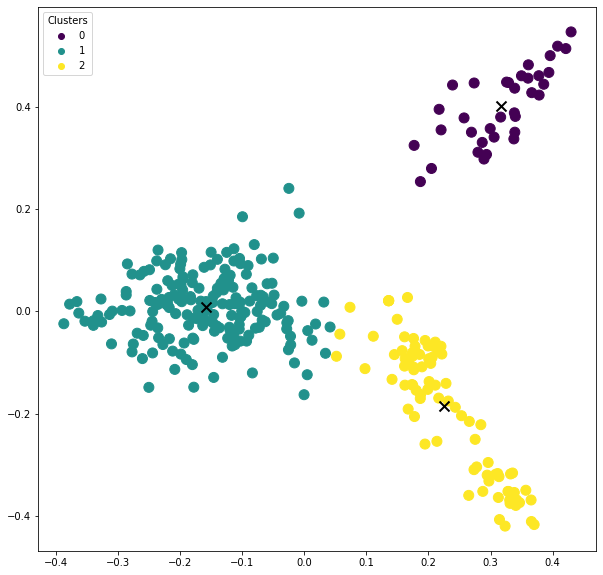

In [28]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")